YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0355
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0028
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0028
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0021
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0019
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 10/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0016
Epoch 11/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 12/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 13/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 14/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 15/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoc

[*********************100%***********************]  1 of 1 completed


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


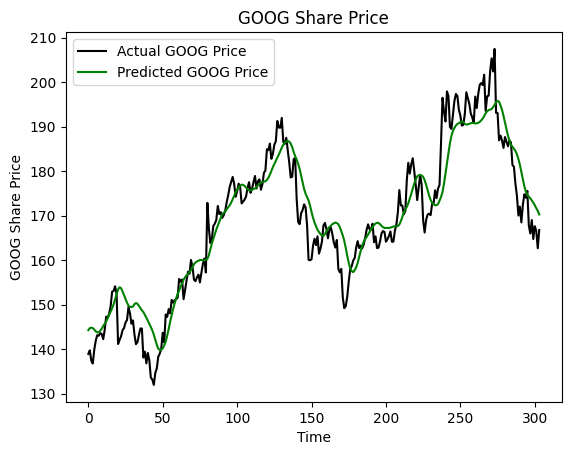

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Prediction: [[164.04285]]


In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas_datareader as web
import datetime as dt
import keras

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Define the company and date range
company = "GOOG"
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2024, 1, 1)

# Load the data using yfinance
data = yf.download(company, start=start, end=end)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the training data
prediction_days = 10

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

# Test Data
test_start = dt.datetime(2024, 1, 1)
test_end = dt.datetime.now()

# Load test data using yfinance
test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Prepare test inputs
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()


real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")


